In [15]:
!pip install yfinance beautifulsoup4 pandas plotly lxml matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 134.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 141.8 MB/s eta 0:00:00


In [3]:
# ---------------------------------------
# Question 1: Use yfinance to Extract Tesla Stock Data
# ---------------------------------------

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go

# Extract Tesla stock data
tsla = yf.Ticker("TSLA")
tesla_data = tsla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [25]:
# ---------------------------------------
# Question 2: Use Webscraping to Extract Tesla Revenue Data
# ---------------------------------------

import requests, pandas as pd
from bs4 import BeautifulSoup
from io import StringIO

r = requests.get(
    "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue",
    headers={"User-Agent":"Mozilla/5.0"}
)
tbl = BeautifulSoup(r.text, "html.parser") \
      .find("table", {"class":"historical_data_table table"})
df = pd.read_html(StringIO(str(tbl)))[0]
df.columns = ["Date", "Revenue"]
df = df[df["Date"]!="Date"]
df["Revenue"] = df["Revenue"].str.replace(r"[\$,]","",regex=True).astype(float)
df.tail()



,Date,Revenue
11,2013,2013.0
12,2012,413.0
13,2011,204.0
14,2010,117.0
15,2009,112.0


In [6]:
# ---------------------------------------
# Question 3: Use yfinance to Extract GameStop Stock Data
# ---------------------------------------

# Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [26]:
# ---------------------------------------
# Question 4: Use Webscraping to Extract GameStop Revenue Data
# ---------------------------------------

import requests, pandas as pd
from bs4 import BeautifulSoup
from io import StringIO

r = requests.get(
    "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue",
    headers={"User-Agent":"Mozilla/5.0"}
)
tbl = BeautifulSoup(r.text, "html.parser") \
      .find("table", {"class":"historical_data_table table"})
df = pd.read_html(StringIO(str(tbl)))[0]
df.columns = ["Date", "Revenue"]
df = df[df["Date"]!="Date"]
df["Revenue"] = df["Revenue"].str.replace(r"[\$,]","",regex=True).astype(float)
df.tail()




,Date,Revenue
12,2013,8887.0
13,2012,9551.0
14,2011,9474.0
15,2010,9078.0
16,2009,8806.0


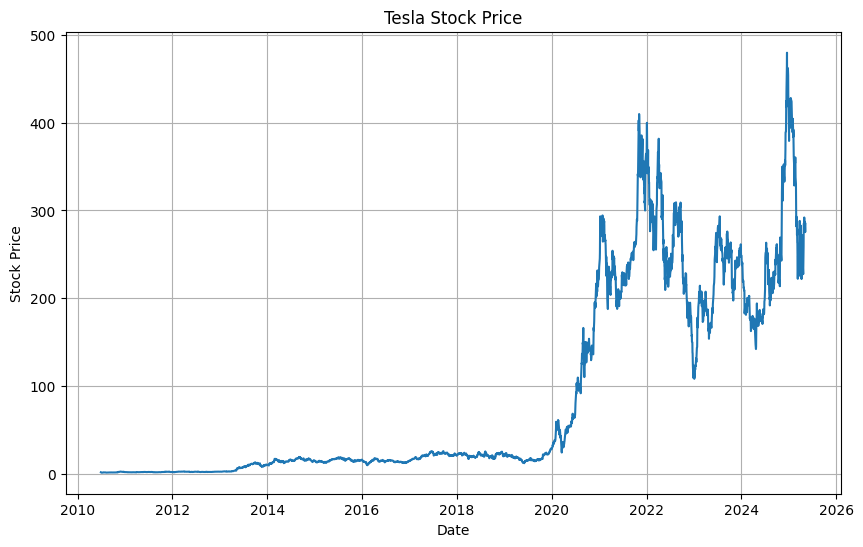

In [18]:
# ---------------------------------------
# Question 5: Plot Tesla Stock Graph
# ---------------------------------------

import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10,6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()

make_graph(tesla_data, 'Tesla Stock Price')


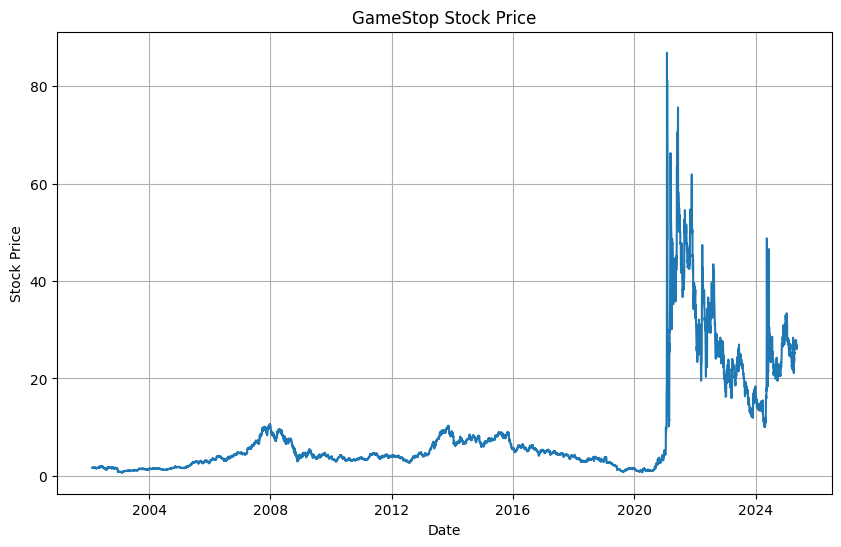

In [19]:
# ---------------------------------------
# Question 6: Plot GameStop Stock Graph
# ---------------------------------------

make_graph(gme_data, 'GameStop Stock Price')
